<a href="https://www.kaggle.com/code/mattspotify2023/titanic-abdul?scriptVersionId=142263218" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Number of males who survived  0.18890814558058924
0.18890814558058924 is the percentage of males who survived and 0.7420382165605095 is the percentage of females who survived


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed 

              precision    recall  f1-score   support

       False       0.82      0.87      0.84       157
        True       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268
 [[136  21]
 [ 30  81]]
              precision    recall  f1-score   support

       False       0.81      0.85      0.83       157
        True       0.77      0.71      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

[[133  24]
 [ 32  79]]
0.8097014925373134 0.7910447761194029
Log reg accuracy score is 0.8097014925373134 and SVC accuracy score is 0.7910447761194029
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       -------

,PassengerIds,Survived
0,892,False
1,893,False
2,894,False
3,895,False
4,896,False
...,...,...
413,1305,False
414,1306,True
415,1307,False
416,1308,False


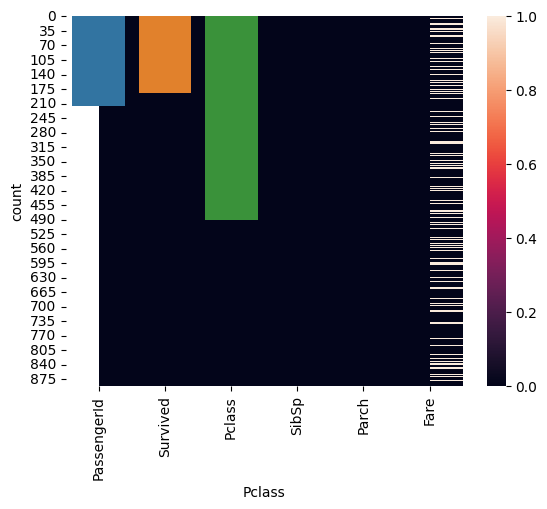

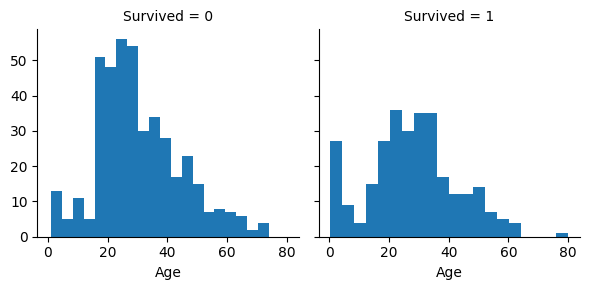

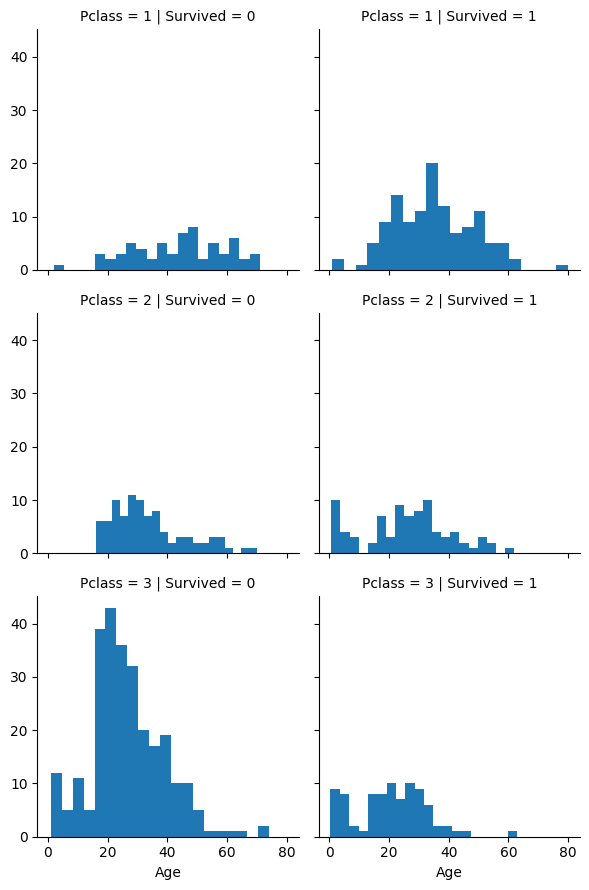

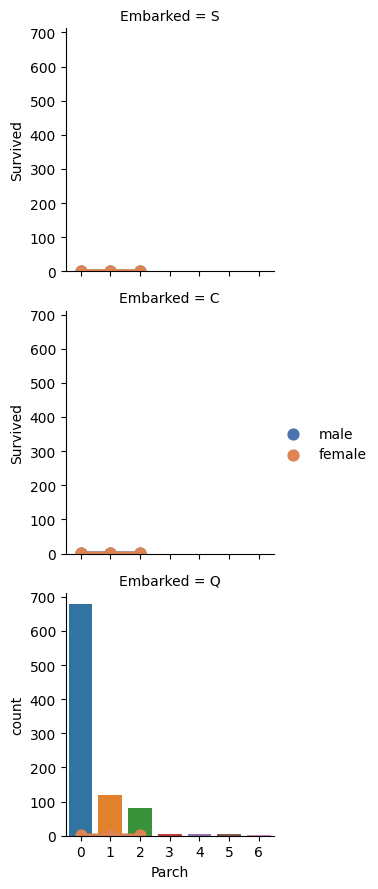

In [2]:

#write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# %% [markdown]
# 

# %%
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# %%
df=pd.read_csv('/kaggle/input/titanic/train.csv')


# %%
df.head()

# %%
sns.heatmap(df.isnull())

# %%
df.isnull().sum()

# %%
df['Sex'].value_counts()

# %%
male_pass_count=df[df['Sex']=="male"]['Survived'].sum()
female_pass_count=df[df['Sex']=="female"]['Survived'].sum()

# %%
male_total_count=(df['Sex']=="male").sum()
female_total_count=(df['Sex']=="female").sum()

# %%
male_pass_percent=male_pass_count/male_total_count

# %%
print("Number of males who survived ",male_pass_percent)

# %%
female_pass_percent=float(female_pass_count/female_total_count)

# %%
print("{} is the percentage of males who survived and {} is the percentage of females who survived".format(male_pass_percent,female_pass_percent))

# %%
df.isnull().sum()

# %%
df.groupby('Sex')[('Age')].mean()

# %%
df["Age"].isna().sum()

# %%
def age_impute(x,y):
    if x !=[] & y=='male':
        x=30.7
    elif x!=[] & y=='female':
        x=27.9
    return x,y

# %%
#x=df['Age'].iloc[888]
#y=df['Sex'].iloc[888]
#age_impute(x,y)


# %%
sns.countplot(x='Pclass',data=df)

# %%
df._get_numeric_data().columns

# %%
df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()["Age"].drop('Age').plot(kind='bar')

# %%
#Great way to groupby... didn't know we could do this
df[['Survived','Pclass', 'Age']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=False)

# %%
#greatway to plot conditionally
g=sns.FacetGrid(col='Survived',data=df)
g.map(plt.hist,'Age',bins=20)

# %%
g=sns.FacetGrid(col='Survived',row='Pclass',data=df)
g.map(plt.hist,'Age',bins=20)

# %%
grid = sns.FacetGrid(df, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

# %%
df.head()

# %%
df['Parch'].nunique()

# %%
sns.countplot(x='Parch',data=df)

# %%
df['Age'].mean()

# %%
#Replacing age with mean age. We could go one more step deeper to replace seperate for Male and Female
df["Age"]=df["Age"].fillna(df['Age'].mean())

# %%
df.isna().sum()

# %%
df.head()

# %%
df.drop(['PassengerId','Name','Parch','Ticket'],axis=1,inplace=True)

# %%
sub_survived=pd.get_dummies(df['Survived'],drop_first=True)

# %%
sub_survived

# %%
df=pd.concat([(df.drop('Survived',axis=1)),sub_survived],axis=1)

# %%
df.head()

# %%
df.rename(columns={1:'Survived'},inplace=True)

# %%
df.head()

# %%
sub_embark=pd.get_dummies(df['Embarked'],drop_first=True)

# %%
sub_embark

# %%
df=pd.concat([df.drop('Embarked',axis=1),sub_embark],axis=1)

# %%
df.head()

# %%
df['Sex']=df['Sex'].map({"male":1,"female":0})

# %%
df.drop("Cabin",axis=1,inplace=True)

# %%
df.head()

# %%
X=df.drop("Survived",axis=1)
y=df["Survived"]

# %%
from sklearn.model_selection import train_test_split

# %%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# %%
from sklearn.linear_model import LogisticRegression

# %%
model=LogisticRegression()

# %%
model.fit(X_train,y_train)

# %%
predict=model.predict(X_test)

# %%
from sklearn.metrics import confusion_matrix,classification_report

# %%
print(classification_report(y_test,predict),confusion_matrix(y_test,predict))

# %%
from sklearn.ensemble import RandomForestClassifier

# %%
rcf=RandomForestClassifier()

# %%
rcf.fit(X_train,y_train)

# %%
rcf_predict=rcf.predict(X_test)

# %%
print(classification_report(y_test,rcf_predict))

# %%
print(confusion_matrix(y_test,rcf_predict))

# %%
from sklearn.metrics import mean_squared_error

# %%
#mean_squared_error(y_test,predict)

# %%
from sklearn.metrics import accuracy_score

# %%
print(accuracy_score(y_test,predict),accuracy_score(y_test,rcf_predict))

# %%
print("Log reg accuracy score is {} and SVC accuracy score is {}".format(accuracy_score(y_test,predict),accuracy_score(y_test,rcf_predict)))

# %% [markdown]
# Need to Clean Test data similar to train data
# 

# %%
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')

# %%
test_df.info()

# %%
X_train.head()

# %%
test_df.head()

# %%
test_df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

# %%
test_df.isnull().sum()

# %%
test_df['Age']=test_df["Age"].fillna(test_df["Age"].mean())


# %%
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].mean())

# %%
test_df["Sex"]=test_df['Sex'].map({"male":1,"female":0})

# %%
test_df.head()

# %%
em_test_dum=pd.get_dummies(test_df['Embarked'],drop_first=True)

# %%
test_df=pd.concat([test_df.drop('Embarked',axis=1),em_test_dum],axis=1)

# %%
test_df.drop("Parch",axis=1,inplace=True)

# %%
test_pred=rcf.predict(test_df)

# %%
test_df_1=pd.read_csv('/kaggle/input/titanic/test.csv')

# %%
ids=test_df_1['PassengerId']

# %%
type(ids)

# %%


# %%
output=pd.DataFrame({'PassengerIds':ids,'Survived':test_pred})

# %%
output

# %%





